<a href="https://colab.research.google.com/github/JoyBis48/NLP_Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Dataset

In [ ]:
ds = pd.read_csv('Reddit_Data.csv')
ds = ds.reset_index()
ds.head()

,index,clean_comment,category
0,0,family mormon have never tried explain them t...,1
1,1,buddhism has very much lot compatible with chr...,1
2,2,seriously don say thing first all they won get...,-1
3,3,what you have learned yours and only yours wha...,0
4,4,for your own benefit you may want read living ...,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          37249 non-null  int64 
 1   clean_comment  37149 non-null  object
 2   category       37249 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 873.1+ KB


## Preprocessing the data

In [ ]:
#handles already preprocessed
#special characters numbers and punctuations already removed

#removing short words (ignoring words having letters <=3)
ds['clean_comment'] = ds['clean_comment'].apply( lambda x: " ".join([ l for l in str(x).split() if len(l)>3 ]) )
ds.head()

,index,clean_comment,category
0,0,family mormon have never tried explain them th...,1
1,1,buddhism very much compatible with christianit...,1
2,2,seriously thing first they complex explain nor...,-1
3,3,what have learned yours only yours what want t...,0
4,4,your benefit want read living buddha living ch...,1


In [ ]:
#considering indvidual words as tokens
token = ds["clean_comment"].apply(lambda x: str(x).split())
token.head()

0    [family, mormon, have, never, tried, explain, ...
1    [buddhism, very, much, compatible, with, chris...
2    [seriously, thing, first, they, complex, expla...
3    [what, have, learned, yours, only, yours, what...
4    [your, benefit, want, read, living, buddha, li...
Name: clean_comment, dtype: object

In [ ]:
#stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
token = token.apply( lambda x: [stemmer.stem(word) for word in x] )
token.head()

0    [famili, mormon, have, never, tri, explain, th...
1    [buddhism, veri, much, compat, with, christian...
2    [serious, thing, first, they, complex, explain...
3    [what, have, learn, your, onli, your, what, wa...
4    [your, benefit, want, read, live, buddha, live...
Name: clean_comment, dtype: object

In [ ]:
#combining words into single sentence
for i in range( len (token) ):
  token[i] = " ".join(token[i])

ds["clean_comment"] = token
ds.head()

,index,clean_comment,category
0,0,famili mormon have never tri explain them they...,1
1,1,buddhism veri much compat with christian espec...,1
2,2,serious thing first they complex explain norma...,-1
3,3,what have learn your onli your what want teach...,0
4,4,your benefit want read live buddha live christ...,1


## Exploratory Data Analysis

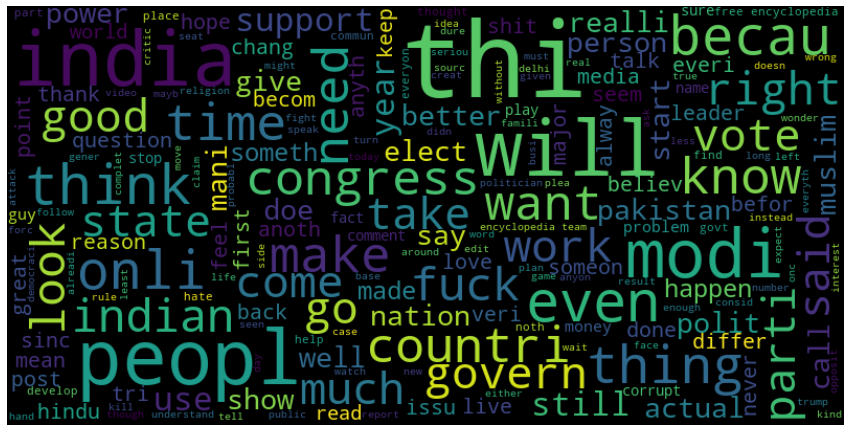

In [ ]:
#displaying the repeating words
all_words = " ".join( [ x for x in ds["clean_comment"] ] )

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, random_state =42 , max_font_size = 100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


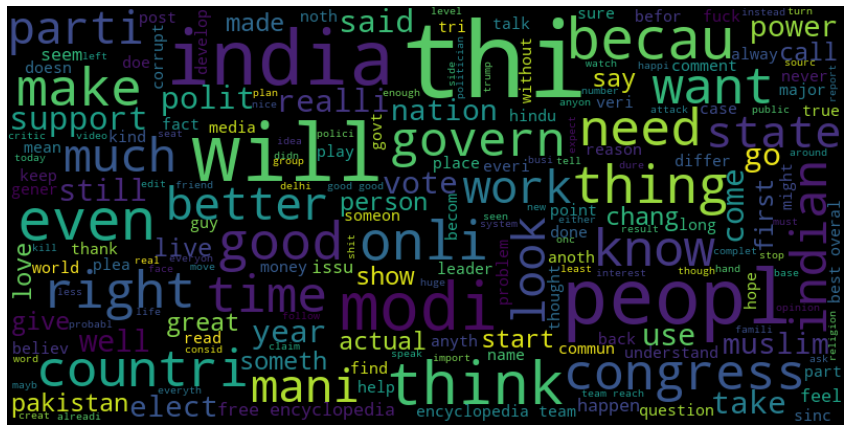

In [ ]:
#displaying the repeating words for +ve response

all_words = " ".join( [ x for x in ds["clean_comment"] [ds['category'] == 1] ] )

wordcloud = WordCloud(width = 800, height = 400, random_state =42 , max_font_size = 100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()



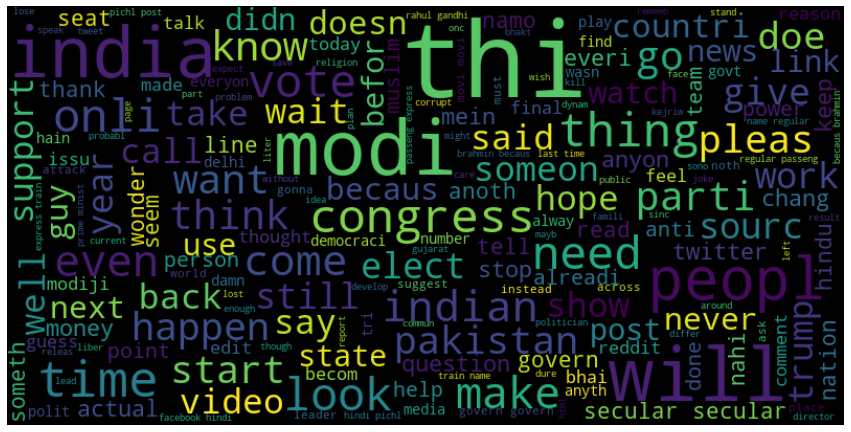

In [ ]:
#displaying the repeating words for neutral response

all_words = " ".join( [ x for x in ds["clean_comment"] [ds['category'] == 0] ] )

wordcloud = WordCloud(width = 800, height = 400, random_state =42 , max_font_size = 100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


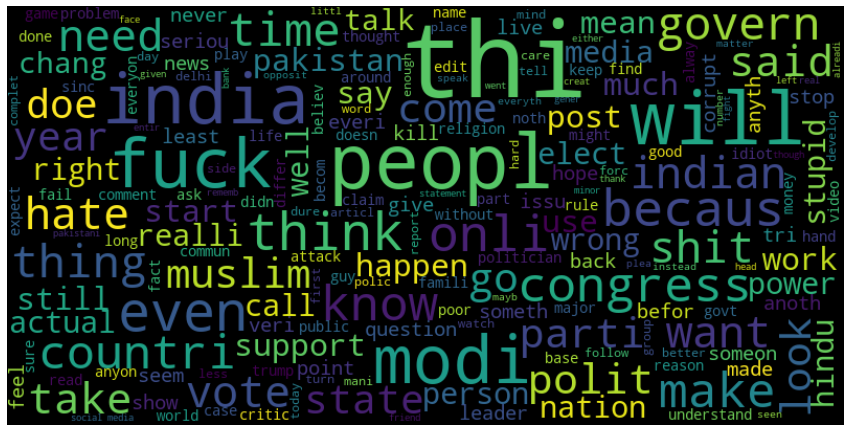

In [ ]:
#displaying the repeating words for -ve response

all_words = " ".join( [ x for x in ds["clean_comment"] [ds['category'] == -1] ] )

wordcloud = WordCloud(width = 800, height = 400, random_state =42 , max_font_size = 100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


##  Spliiting Input

In [ ]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
collection_vectorizer = CountVectorizer( max_df = 0.90 , min_df = 2 , max_features=1000, stop_words='english' )
collection = collection_vectorizer.fit_transform(ds['clean_comment']) 

In [ ]:
collection #collection has the 'bag of words'

<37249x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 326120 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(collection, ds['category'], random_state = 42, test_size = 0.25)


## Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred, average = 'macro')


0.7232164553226818

In [ ]:
accuracy_score(y_test,pred)

0.746590787071835